# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/[Distinct Team]/Dataset/Training Data.csv'
data_mentah = pd.read_csv(file_path)
data_mentah = pd.DataFrame(data_mentah)
data = pd.read_csv(file_path)
data = pd.DataFrame(data)
data_extract = pd.read_csv(file_path)
data_extract = pd.DataFrame(data_extract)
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


# EDA (Exploratory Data Analysis)

## 1. Descriptive Statistics

In [ ]:
# melihat informasi awal dari dataset & nilai null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
# memisahkan kolom numerikal & kategorikal
numerikal = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
kategorikal = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# melihat deskripsi kolom kategorikal & nilai unique
data.select_dtypes(include='object').nunique()


Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

In [ ]:
# cek nilai unique di kolom kategorikal
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].unique()}")

Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
CITY: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'


In [ ]:
# melihat deskripsi kolom numerikal
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


**Kesimpulan dari Descriptive Statistics**
1.  Data terdiri dari 252000 baris and 13 kolom dan tidak ada nilai null
2.  5 kolom dengan variabel kontinu : Income , Age , Experience , Current_Job_years , Current_House_years
3.  8 kolom dengan variabel kategori : ID , Marriage status ,house ownership, car ownership , profession , city , state , Risk flag (target variabel)

## 2. Univariate Analysis

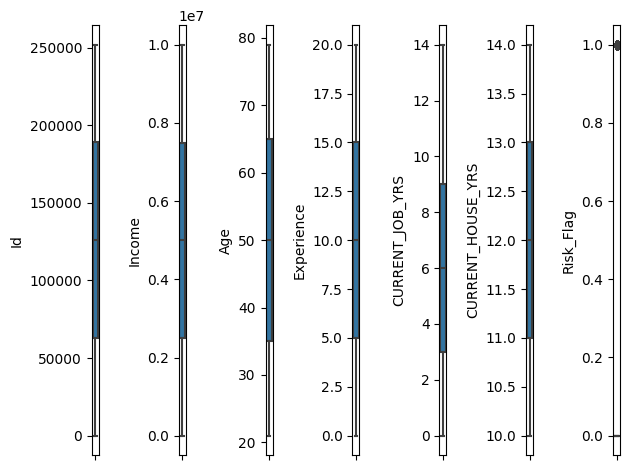

In [ ]:
# analisis setiap kolom numerik untuk melihat distribusi nilai (menggunakan boxplot)

features = numerikal
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=data[features[i]])
  plt.tight_layout()

Kesimpulan distribusi nilai pada kolom numerik: tidak ada outlier

Tidak adanya outlier menandakan bahwa distribusi data normal

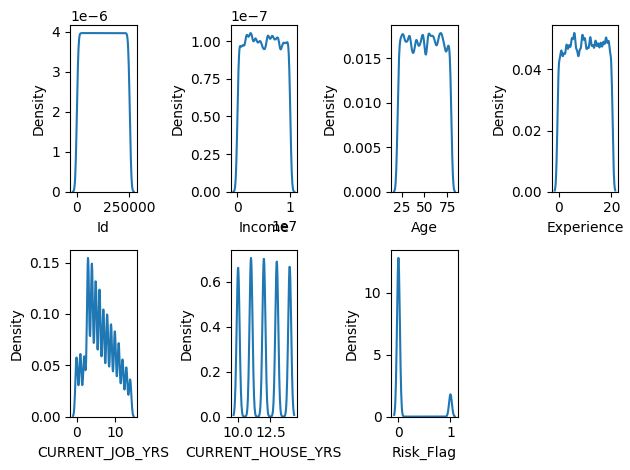

In [ ]:
# analisis setiap kolom numerik untuk melihat distribusi nilai (menggunakan distribution plot)

features = numerikal
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=data[features[i]])
  plt.xlabel(features[i])
  plt.tight_layout()

Bentuk distribusi setiap kolom numerik
- Income, age dan experience : uniform distribution, karena data memiliki nilai yang seragam dan tidak terjadi lonjakan sehingga data memiliki probabilitas yang sama
- Current_job_yrs : Skewness positive, ekor distribusi berada di sebelah kanan dengan nilai terbanyak sehingga distribusi sebagian besar berada pada nilai rendah
- current_house_yrs : multimodal distribution curve, karena data memiliki modus yang lebih dari satu

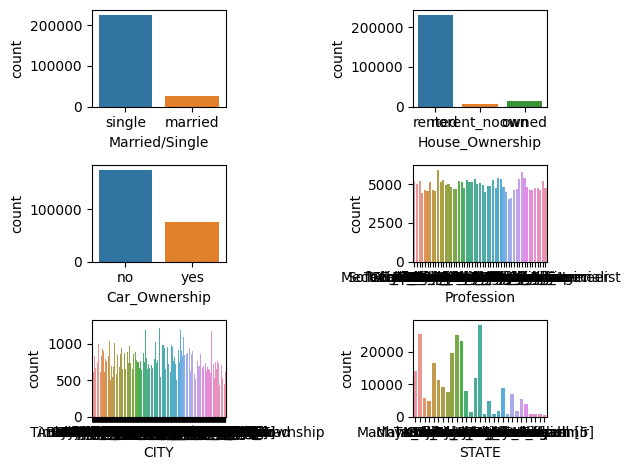

In [ ]:
# analisis setiap kolom kategorik untuk melihat distribusi nilai (menggunakan countplot)

features = kategorikal
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data[features[i]])
  plt.tight_layout()

1. Kolom kategorikal dengan banyak kategori terjadi pada kolom city, state dan profession sehingga data perlu dikelompokan menjadi beberapa kategori yang serupa menjadi satu kategori baru untuk menyederhanakan data.

2. Kolom Kategorikal dengan Dominasi Kategori Tertentu pada kolom married/single, dan house_ownership yang mengindikasikan ketidakseimbangan dalam data sehingga perlu diperhatikan apakah akan memperngaruhi memengaruhi analisis seperti oversampling atau undersampling diperlukan.

In [4]:
# Grouping data per kolom

#Data professions
profession_group = {
    "Healthcare": ['Physician', 'Psychologist', 'Dentist', 'Surgeon'],
    "Research, Engineering & IT": ['Statistician', 'Web_designer', 'Engineer',
                        'Computer_hardware_engineer', 'Drafter', 'Scientist',
                        'Industrial_Engineer', 'Mechanical_engineer',
                        'Chemical_engineer', 'Biomedical_Engineer',
                        'Petroleum_Engineer', 'Technology_specialist',
                        'Design_Engineer', 'Civil_engineer',
                        'Software_Developer', 'Computer_operator', 'Technical_writer',
                        'Graphic_Designer', 'Web_designer', 'Architect', 'Technician',
                        'Microbiologist', 'Geologist', 'Statistican', 'Surveyor'],
    "Finance": ['Financial_Analyst', 'Economist', 'Analyst', 'Chartered_Accountant'],
    "Excecutive": ['Magistrate', 'Consultant','Official','Politican','Lawyer'],
    "Public Service": ['Civil_servant', 'Police_officer', 'Army_officer', 'Hotel_Manager',
                       'Flight_attendant', 'Air_traffic_controller', 'Aviator','Firefighter', 'Chef',
                       'Librarian'],
    "Art & Entertainment": ['Comedian', 'Artist', 'Fashion_Designer']
}

# Data state
state_group = {
    'West Zone': ['Rajasthan', 'Maharashtra', 'Gujarat',
                'Daman & Diu', 'Dadra & Nagar Haveli',
                'Maharashtra', 'Goa', 'Madhya_Pradesh'],
    'South Zone': ['Andhra Pradesh', 'Andhra_Pradesh', 'Karnataka', 'Lakshadweep',
                'Kerala', 'Tamil Nadu', 'Tamil_Nadu', 'Puducherry',
                'Andaman & Nicobar'],
    'North Zone': ['Jammu & Kashmir', 'Jammu_and_Kashmir', 'Himachal Pradesh', 'Himachal_Pradesh', 'Punjab',
                'Chandigarh', 'Uttarakhand', 'Haryana', 'Telangana',
                'Delhi', 'Uttar Pradesh', 'Uttar_Pradesh', 'Uttar_Pradesh[5]'],
    'East Zone': ['Bihar', 'Sikkim', 'Arunachal Pradesh', 'Arunachal_Pradesh',
                'Nagaland', 'Manipur', 'Mizoram',
                'Tripura', 'Meghalaya', 'Assam',
                'West Bengal', 'West_Bengal', 'Jharkhand', 'Odisha',
                'Chhattisgarh']
}

# Data kota
city_group = {
    'Metro': ['Mumbai', 'Delhi_city', 'Kolkata', 'Bangalore', 'Chennai', 'Hyderabad', 'Pune'],
    'Urban': ['Ahmedabad', 'Gurgaon', 'Noida', 'Navi_Mumbai', 'Thane', 'Jaipur', 'Vadodara', 'Vijayawada'],
    'Suburban': ['Lucknow', 'Nagpur', 'Indore', 'Kochi', 'Bhopal', 'Patna', 'Visakhapatnam', 'Coimbatore'],
    'Town': ['Srinagar', 'Jodhpur', 'Amritsar', 'Kota', 'Ajmer', 'Bikaner', 'Mysore'],
    'Rural': ['Gorakhpur', 'Warangal', 'Siliguri', 'Dhanbad', 'Farrukhabad', 'Haldia', 'Gangtok']
}

# Data age
generation = {
    "Millennials": range(21, 40),
    "Gen X": range(40, 55),
    "Baby Boomers": range(55, 80)
}

# Data income
income_group = {
    "Low": (10310, 200000),
    "Medium": (200000, 1000000),
    "High": (1000000, float('inf'))
}

# Data experience
experience_level = {
    "Beginner": range(0, 5),
    "Intermediate": range(5, 10),
    "Expert": range(10, int(1e6))
}

# Data work experience
work_position = {
    "Junior": range(0, 3),
    "Mid-level": range(3, 7),
    "Senior": range(7, int(1e6))
}

# Buat kolom baru berdasarkan kriteria profesi
data['Profession_Group'] = data['Profession'].apply(lambda x: next(
    (k for k, v in profession_group.items() if x in v), 'Other'))

# Buat kolom baru berdasarkan kriteria kota
data['City_Group'] = data['CITY'].apply(lambda x: next(
    (k for k, v in city_group.items() if x in v), 'Other'))

# Buat kolom 'Age_Group' berdasarkan kriteria umur
data['Age_Group'] = data['Age'].apply(lambda x: next(
    (k for k, v in generation.items() if x in v), 'Other'))

# Buat kolom 'Income_Group' berdasarkan kriteria pendapatan
data['Income_Group'] = data['Income'].apply(lambda x: next(
    (k for k, v in income_group.items() if v[0] <= x < v[1]), 'Other'))

# Buat kolom 'Experience_Group' berdasarkan kriteria pengalaman
data['Experience_Group'] = data['Experience'].apply(lambda x: next(
    (k for k, v in experience_level.items() if x in v), 'Other'))

# Buat kolom 'Work_Experience_Group' berdasarkan kriteria pengalaman kerja
data['CURRENT_JOB_Group'] = data['CURRENT_JOB_YRS'].apply(lambda x: next(
    (k for k, v in work_position.items() if x in v), 'Other'))

# Buat kolom 'State_Zone' berdasarkan kriteria wilayah (berdasarkan segment_state)
data['State_Zone'] = data['STATE'].apply(lambda x: next(
    (k for k, v in state_group.items() if x in v), 'Other'))

# Tampilkan hasil
data_group = data
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone


In [ ]:
# kolom data setelah grouping
numerikal_group = ['Age_Group', 'Income_Group', 'Experience_Group', 'CURRENT_JOB_Group']
kategorikal_group = ['Profession_Group', 'City_Group', 'State_Zone']

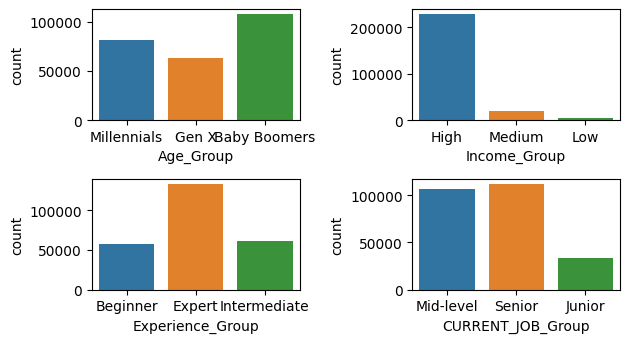

In [ ]:
# distribusi data numerikal setelah grouping
features = numerikal_group
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data[features[i]])
  plt.tight_layout()

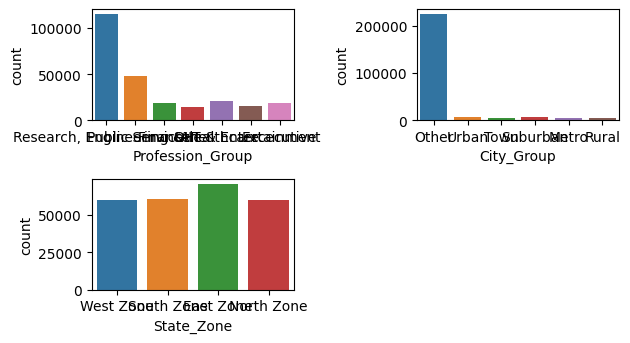

In [ ]:
# distribusi data kategorikal setelah grouping
features = kategorikal_group
for i in range(0, len(features)):
  plt.subplot(3, 2, i+1)
  sns.countplot(x=data[features[i]])
  plt.tight_layout()

Setelah dilakukan grouping pada kolom-kolom yang memiliki kategori yang luas, countplot lebih mudah dibaca dan selanjutnya akan diproses lebih lanjut pada Multivariate Analysis

**Data Pre Processing yang Dapat Dilakukan**:

* Transformasi Data untuk data distribusi yang miring atau non-normal, pertimbangkan untuk menerapkan transformasi pada data numerik.
* Feature Engineering untuk kolom yang terlalu banyak kategori, dapat dikelompokan menjadi beberapa kategori yang lebih umum atau menggunakan metode seperti one-hot encoding atau label encoding.
* Handling Imbalance:untuk data kategorik yang tidak seimbang sehingga akan diputuskan apakah oversampling (menambahkan data minoritas) atau undersampling (mengurangi data mayoritas) diperlukan untuk menyeimbangkan dataset atau tidak
* Feature Selection: Berdasarkan hasil observasi distribusi,dipilih fitur-fitur yang memiliki dampak signifikan dalam analisis.

## 3. Multivariate Analysis

In [ ]:
data.corr()

<ipython-input-15-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<ipython-input-16-75ee2d277e0e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

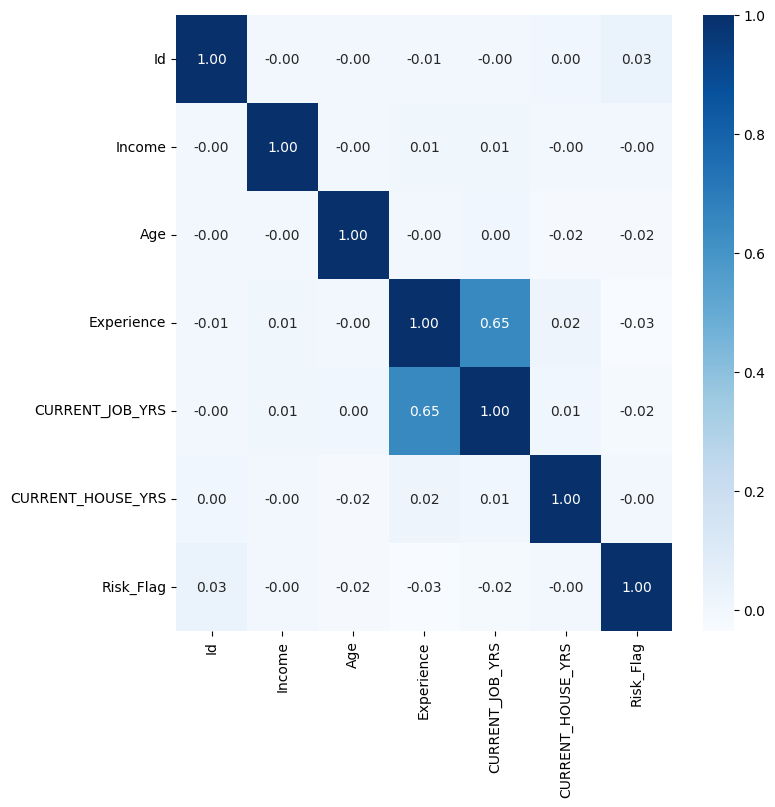

In [ ]:
# correlation heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 1500x1500 with 0 Axes>

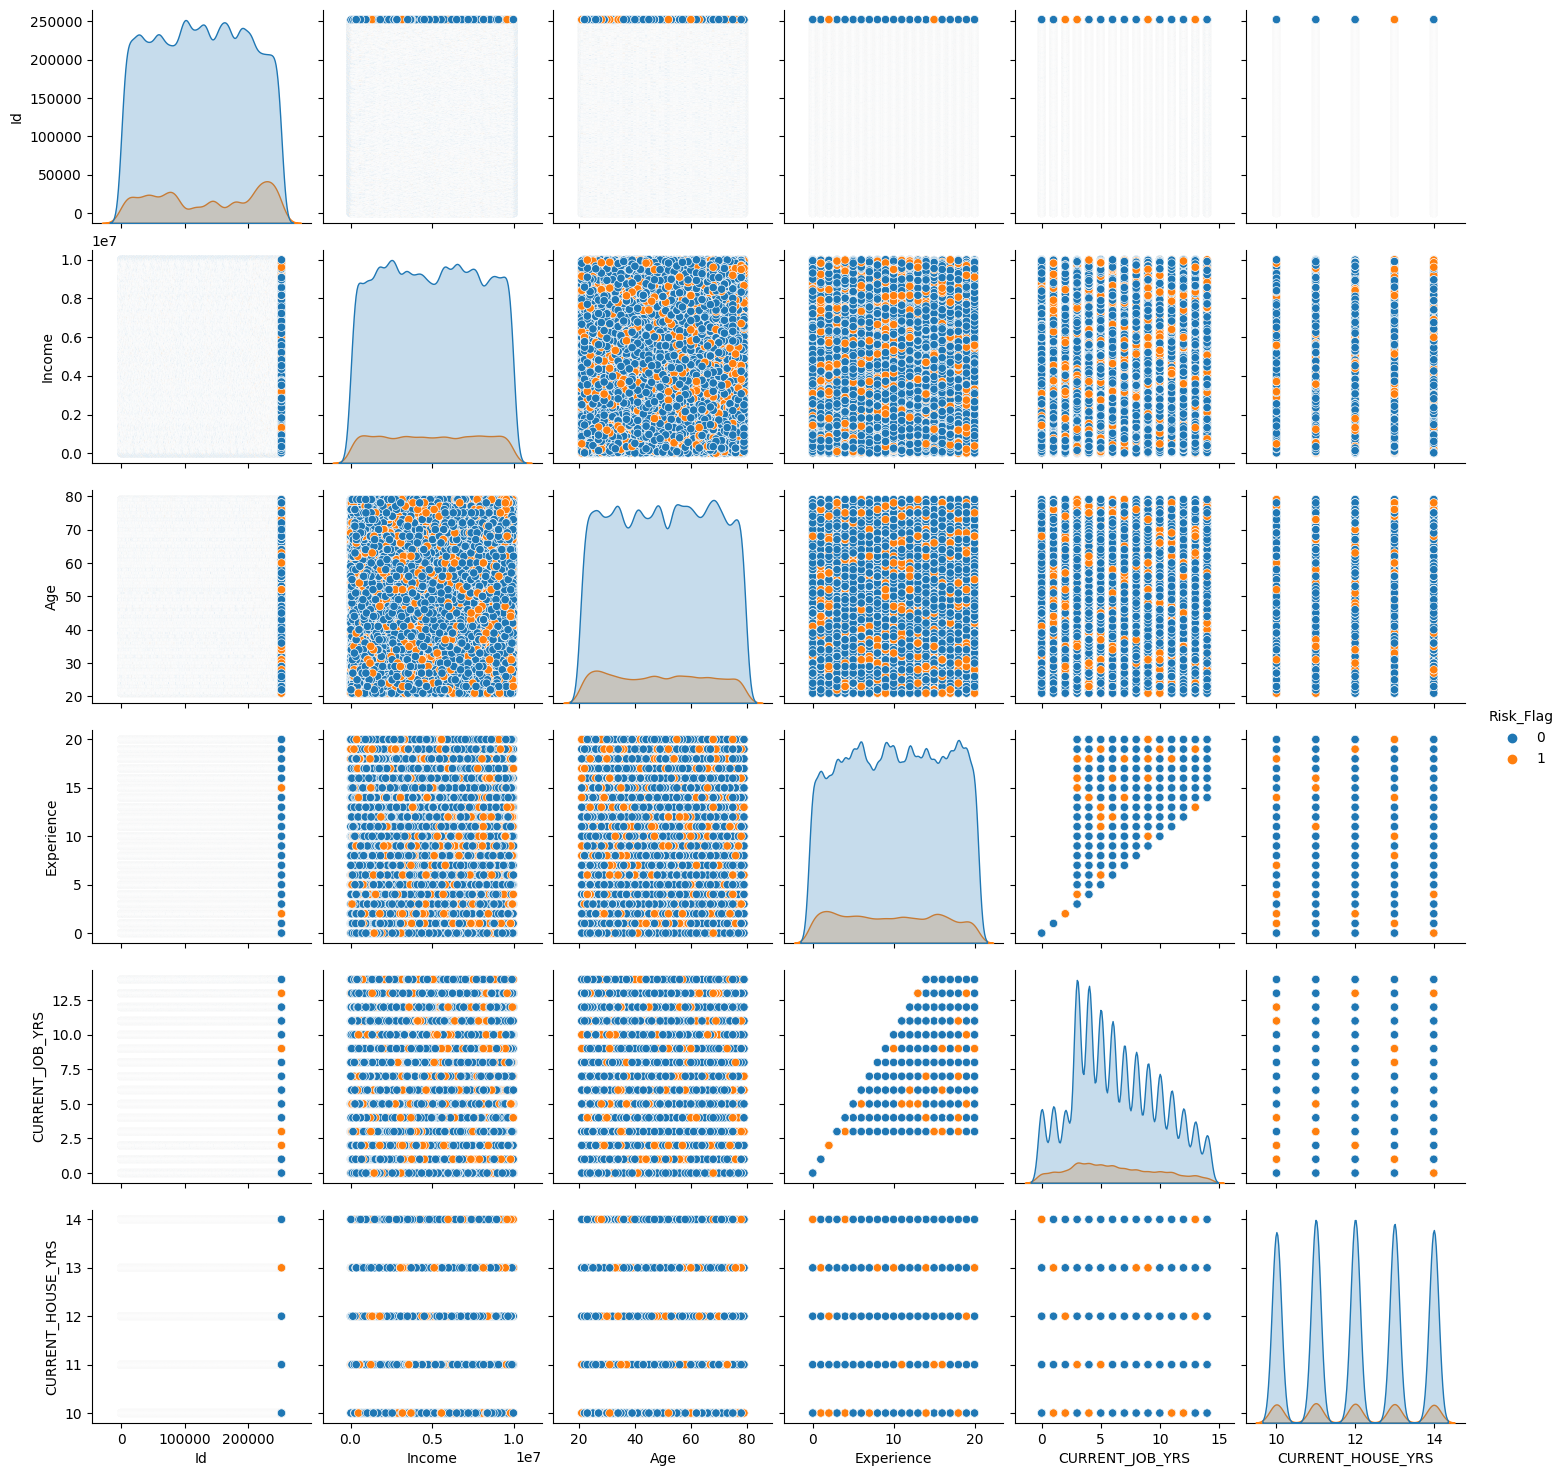

In [ ]:
# pair plot dengan risk_flag sebagai hue

plt.figure(figsize=(15, 15))
sns.pairplot(data, diag_kind='kde', hue='Risk_Flag')

In [ ]:
data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone


<Figure size 1000x800 with 0 Axes>

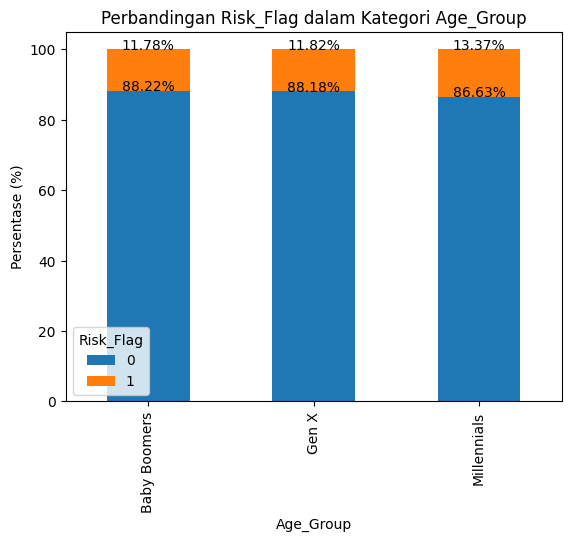

<Figure size 1000x800 with 0 Axes>

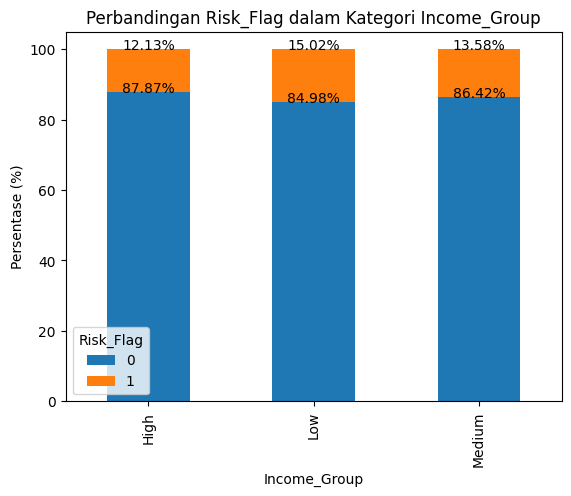

<Figure size 1000x800 with 0 Axes>

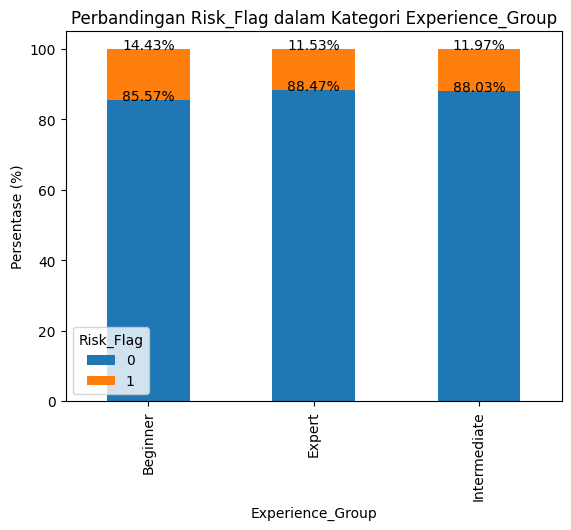

<Figure size 1000x800 with 0 Axes>

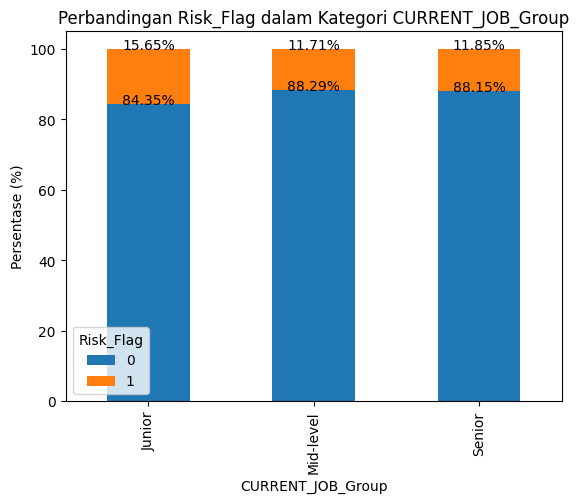

<Figure size 1000x800 with 0 Axes>

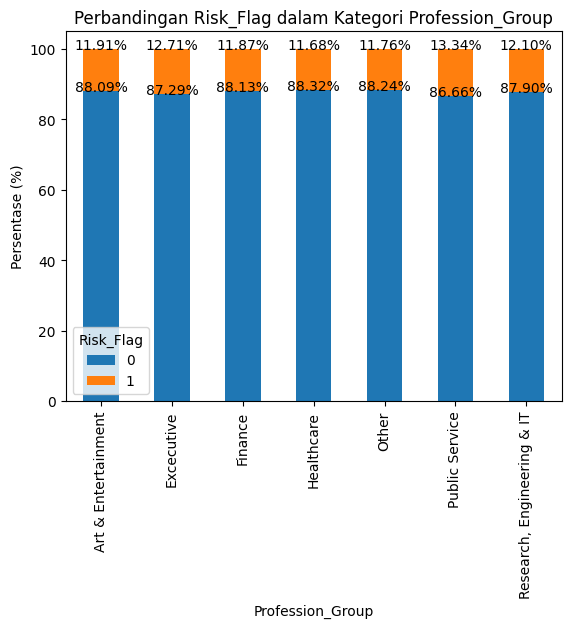

<Figure size 1000x800 with 0 Axes>

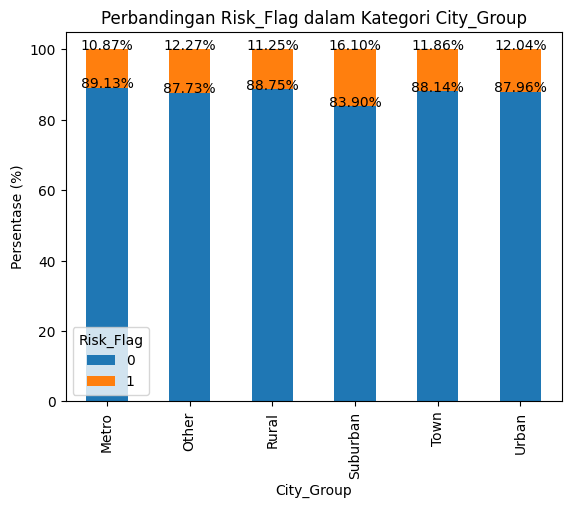

<Figure size 1000x800 with 0 Axes>

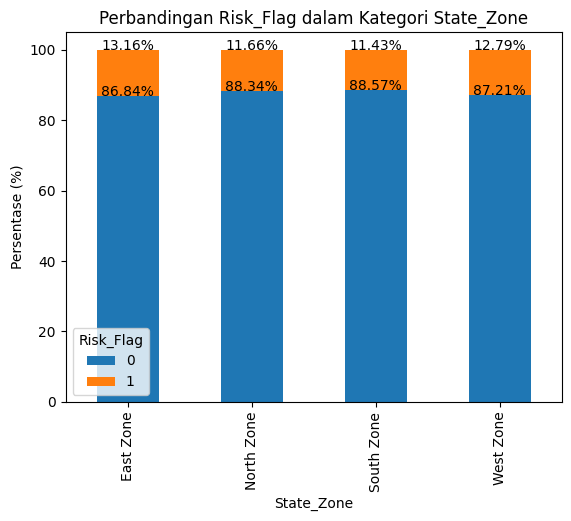

<Figure size 1000x800 with 0 Axes>

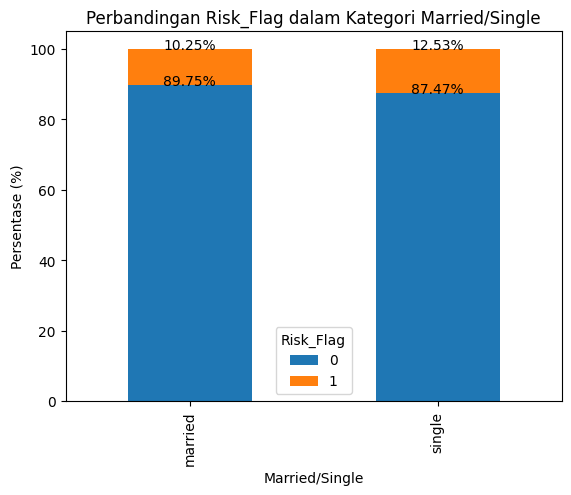

<Figure size 1000x800 with 0 Axes>

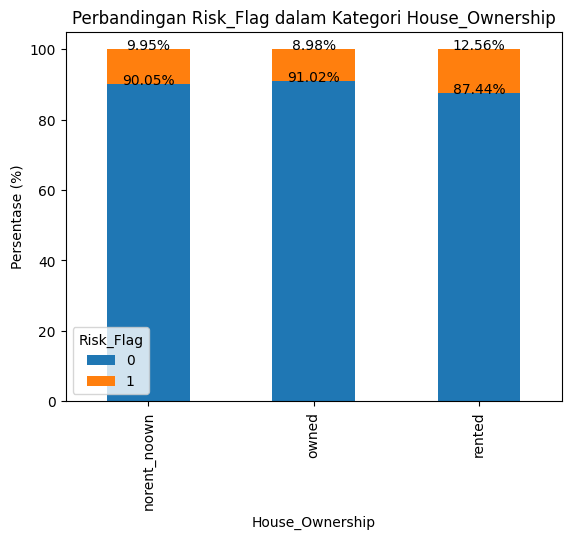

<Figure size 1000x800 with 0 Axes>

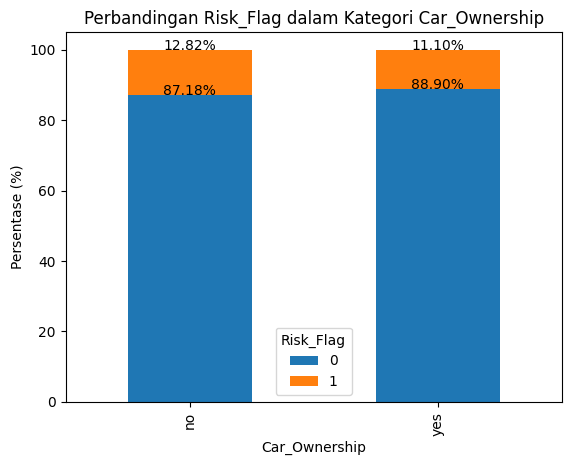

<Figure size 1000x800 with 0 Axes>

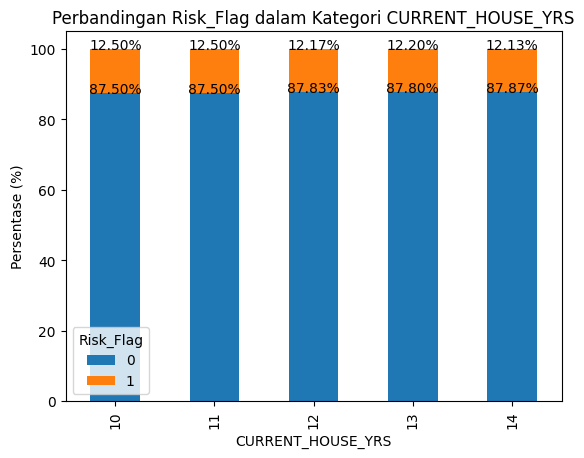

In [ ]:
# visualisasi hubungan antar kolom dengan risk_flag

## list kolom setelah di group
# kolom data setelah grouping
kolom_kategorikal = ['Age_Group', 'Income_Group', 'Experience_Group', 'CURRENT_JOB_Group',
              'Profession_Group', 'City_Group', 'State_Zone', 'Married/Single',
              'House_Ownership', 'Car_Ownership', 'CURRENT_HOUSE_YRS']

for kategori in kolom_kategorikal:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase Risk_Flag (0 dan 1) dalam setiap kategori
    grouped_data = data.groupby(kategori)['Risk_Flag'].value_counts(
        normalize=True).unstack() * 100

    ax = grouped_data.plot(kind='bar', stacked=True)
    plt.title(f'Perbandingan Risk_Flag dalam Kategori {kategori}')
    plt.ylabel('Persentase (%)')

    # Menambahkan label persentase pada plot
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height), ha='center')

    plt.show()

# Business Insight

Dalam penentuan pemberian kredit kepada nasabah, dapat menerapkan prinsip analisa 5C yang meliputi Character (Watak), Capacity (Kemampuan), Capital (Modal), Condition (Kondisi), dan Collateral (Jaminan).
  - **Capacity**

    Nasabah dengan penghasilan income Low cenderung lebih tinggi dalam tingkat risiko kredit dengan persentase 15.02% dari total nasabah dengan kategori penghasilan yang sama
    
  - **Capital**

    Dari data didapatkan bahwa nasabah dengan modal atau kepemilikan harta tidak memiliki mobil dan menyewa rumah memiliki angka risiko yang lebih tinggi dengan persentase masing masing yaitu 11.10% dan 12.56% di setiap kategori kelasnya. Dari data data dapat dirumuskan hipotesis dengan pemberian kredit lebih baik diberikan kepada nasabah yang memiliki harta tetap dibandingkan dengan kepemilikan sementara.
  - **Condition**

    Nasabah dengan status single dan rentang usia Millennials cenderung memiliki tingkat resiko cukup tinggi dalam gagal bayar pinjaman dengan persentase daripada nasabah yang sudah menikah dan/atau nasabah berusia selain millennials dengan masing-masing persentase 12.53% dan 13.37%  di setiap kategori kelasnya.
  - **Collateral**

    Nasabah yang menyewa rumah cenderung lebih tinggi untuk tingkat risiko gagal bayar pinjaman dengan persentase 12.56% dari pada nasabah yang memiliki rumah pribadi 9% dan juga nasabah yang belum mempunyai rumah pribadi 9.95%. Sehingga dalam hal ini, lembaga pemberi pinjaman tidak disarankan untuk memberikan pinjaman terutama dalam jumlah banyak kepada nasabah dengan kepemilikan rumah menyewa dan tanpa kepemilikan rumah.
    
Dalam kemampuan nasabah, nasabah dengan income low lebih berpotensi gagal bayar pinjaman dengan persentase 15%, dibanding dengan nasabah yang memiliki income medium 14%, dan income high 12%. Selain itu, pada feature Age tidak ada perbedaan yang signifikan antara 3 generasi yaitu Gen X, Millennials, dan Baby Boomers dengan risiko gagal bayar pinjaman. Dan untuk feature Experience juga tidak ada perbedaan yang signifikan, namun semakin lama pengalaman nasabah maka semakin kecil nasabah berpotensi gagal bayar pinjaman. Begitu juga dengan feature Current_Job_Yrs, tidak ada perbedaan yang signifikan, namun nasabah dengan current job rendah atau junior maka potensi gagal bayar pinjaman lebih tinggi daripada mid-level dan senior.

# Pre-Processing

## 1. Data Cleansing

### a. Handle Missing Values

### b. Handle Duplicated Data

In [ ]:
import pandas as pd
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone


In [ ]:
# Menghapus kolom 'Id'
data_cek = data.drop('Id', axis=1)

# Jumlah data sebelum handle duplicate (tanpa kolom 'Id')
jumlah_data_sebelum = data_cek.shape[0]
print("Jumlah data sebelum handle duplicate (tanpa kolom 'Id'):", jumlah_data_sebelum)

Jumlah data sebelum handle duplicate (tanpa kolom 'Id'): 252000


In [ ]:
# Mengidentifikasi data duplikat
duplicates = data_cek[data_cek.duplicated(keep=False)]

In [ ]:
# Handle data duplikat
data = data.drop_duplicates()

# Menampilkan jumlah data setelah penanganan duplicate
jumlah_data_sesudah = data.shape[0]
print("Jumlah data setelah handle duplicate:", jumlah_data_sesudah)

Jumlah data setelah handle duplicate: 252000


**Kesimpulan Handle Duplicates** : Jumlah data mentah sebesar 252000, kemudian dilakukan handle duplicates data dengan cara menghapus data yang terduplikasi sehingga diperoleh data bersih sebesar 43190 data.

### c. Handle Outliers

1. Handle Outliers pada kolom Income & Age

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


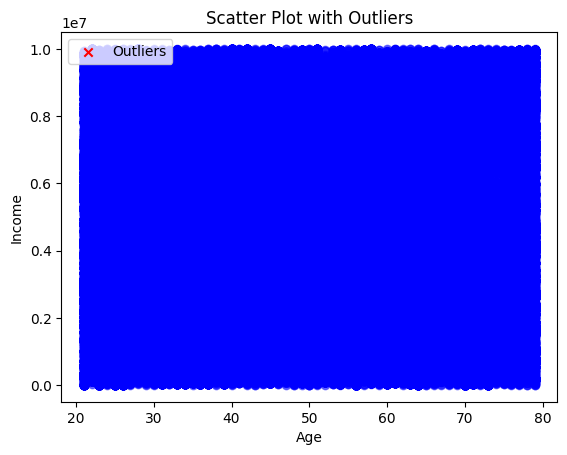

In [ ]:
plt.scatter(data['Age'], data['Income'], color='blue', alpha=0.5)

# Identifikasi outliers
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

outliers = data[(data['Income'] < lower_fence) | (data['Income'] > upper_fence)]

# Tandai outliers dengan warna merah
plt.scatter(outliers['Age'], outliers['Income'], color='red', marker='x', label='Outliers')

#Visualisasi
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot with Outliers')
plt.legend()
plt.show()

Tidak Ada Outliers pada Income dan Age, karena berdasarkan visual scatter plot dapat ditemukan bahwa sebaran data tidak memiliki nilai signifikan dan tidak berjauhan dari pola nya. Selain itu, outliers memiliki simbol "X" dimana pada visualisasi tidak ditemukan simbol "X" sehingga dapat disimpulkan tidak ada outliers pada kolom Income dan Age.

2. Handle Outliers pada Kolom Experience

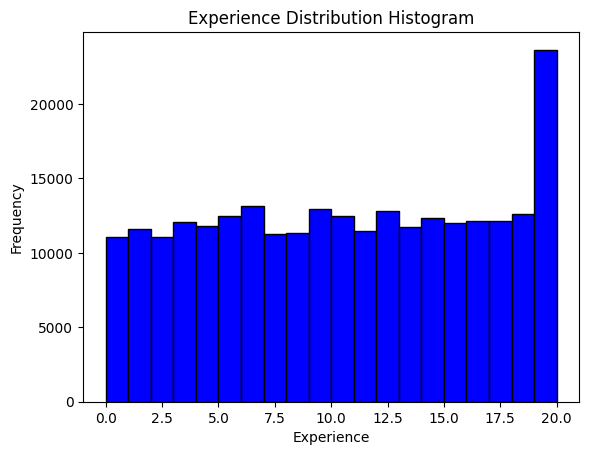

In [ ]:
# Visualisasi Distribusi Data Experience
plt.hist(data['Experience'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.title('Experience Distribution Histogram')
plt.show()

In [ ]:
# Hitung IQR
Q1 = data['Experience'].quantile(0.25)
Q3 = data['Experience'].quantile(0.75)
IQR = Q3 - Q1

# Batas outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers_income = data[(data['Experience'] < lower_fence) | (data['Experience'] > upper_fence)]

print("Outliers in 'Experience' column:")
print(outliers['Experience'])

Outliers in 'Experience' column:
Series([], Name: Experience, dtype: int64)


Tidak ada outliers baik pada uji IQR maupun berdasarkan experience distribution histogram. Karena sebaran data pada historgam tidak memiliki nilai yang signifikan tinggi ataupun signifikan rendah.

3. Handle outliers pada Kolom CURRENT_JOB_YRS

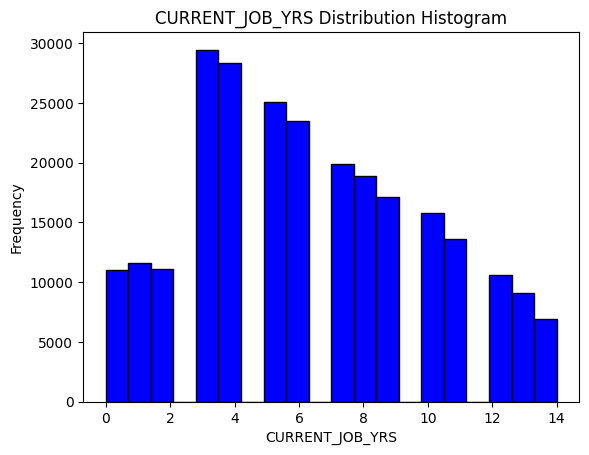

In [ ]:
# Visualisasi Distribusi data
plt.hist(data['CURRENT_JOB_YRS'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('Frequency')
plt.title('CURRENT_JOB_YRS Distribution Histogram')
plt.show()

In [ ]:
# Hitung IQR untuk kolom 'CURRENT_JOB_YRS'
Q1 = data['CURRENT_JOB_YRS'].quantile(0.25)
Q3 = data['CURRENT_JOB_YRS'].quantile(0.75)
IQR = Q3 - Q1

# Batas outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = data[(data['CURRENT_JOB_YRS'] < lower_fence) | (data['CURRENT_JOB_YRS'] > upper_fence)]

print("Outliers in 'CURRENT_JOB_YRS' column:")
print(outliers['CURRENT_JOB_YRS'])

Outliers in 'CURRENT_JOB_YRS' column:
Series([], Name: CURRENT_JOB_YRS, dtype: int64)


Tidak ada outliers baik pada uji IQR maupun berdasarkan experience distribution histogram. Karena sebaran data pada historgam tidak memiliki nilai yang signifikan tinggi ataupun signifikan rendah.

4. Handle outliers pada kolom CURRRENT_HOUSE_YRS

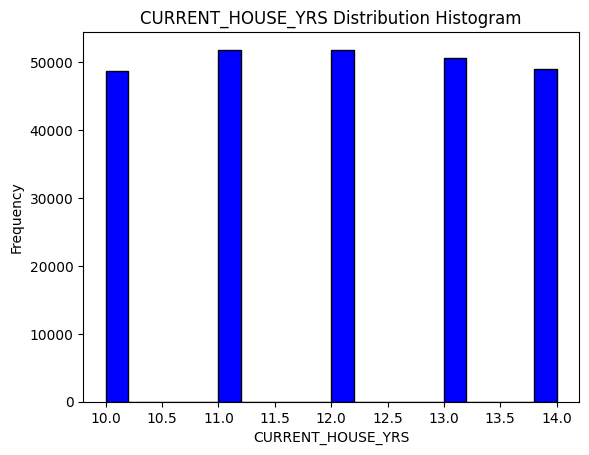

In [ ]:
# Visualisasi Distribusi data
plt.hist(data['CURRENT_HOUSE_YRS'], bins=20, color='blue', edgecolor='black')
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('Frequency')
plt.title('CURRENT_HOUSE_YRS Distribution Histogram')
plt.show()

In [ ]:
# Hitung IQR untuk kolom 'CURRENT_JOB_YRS'
Q1 = data['CURRENT_HOUSE_YRS'].quantile(0.25)
Q3 = data['CURRENT_HOUSE_YRS'].quantile(0.75)
IQR = Q3 - Q1

# Batas outliers
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = data[(data['CURRENT_HOUSE_YRS'] < lower_fence) | (data['CURRENT_HOUSE_YRS'] > upper_fence)]

print("Outliers in 'CURRENT_HOUSE_YRS' column:")
print(outliers['CURRENT_HOUSE_YRS'])

Outliers in 'CURRENT_HOUSE_YRS' column:
Series([], Name: CURRENT_HOUSE_YRS, dtype: int64)


Tidak ada outliers baik pada uji IQR maupun berdasarkan experience distribution histogram. Karena sebaran data pada historgam tidak memiliki nilai yang signifikan tinggi ataupun signifikan rendah.

**Kesimpulan Handle Outliers**: Tidak ditemukan outliers pada pada kolom numerik baik Income, Age, Experience, Current house years, dan current job years.

### d. Feature Transformation

**1. Log Transformation**

<Axes: xlabel='Income', ylabel='Density'>

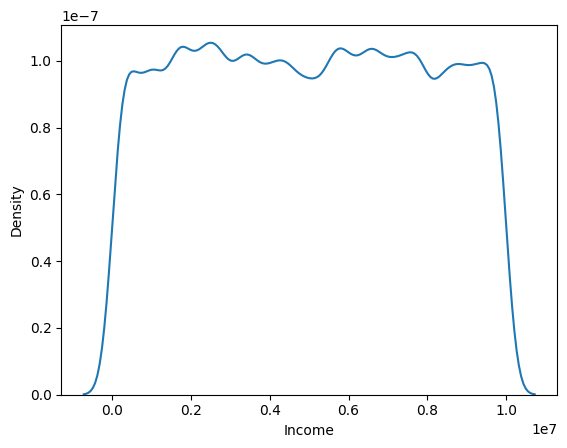

In [ ]:
# distribusi gaji (nilai asli)
sns.kdeplot(data['Income'])

Feature Income memiliki distribusi normal, jadi tidak diperlukan melalukan fitur transformasi

<Axes: xlabel='Age', ylabel='Density'>

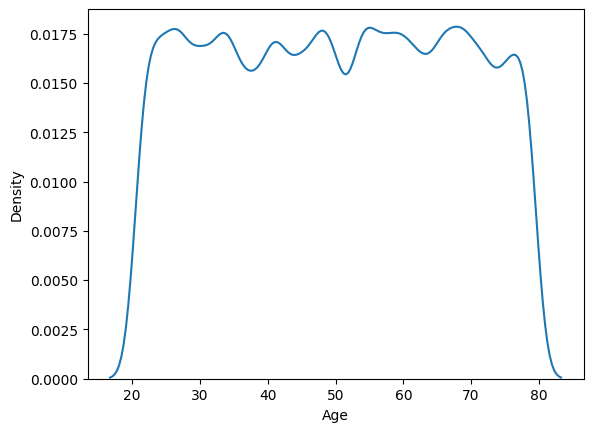

In [ ]:
sns.kdeplot(data['Age'])

Feature Age memiliki distribusi normal, jadi tidak diperlukan melalukan fitur transformasi

<Axes: xlabel='Experience', ylabel='Density'>

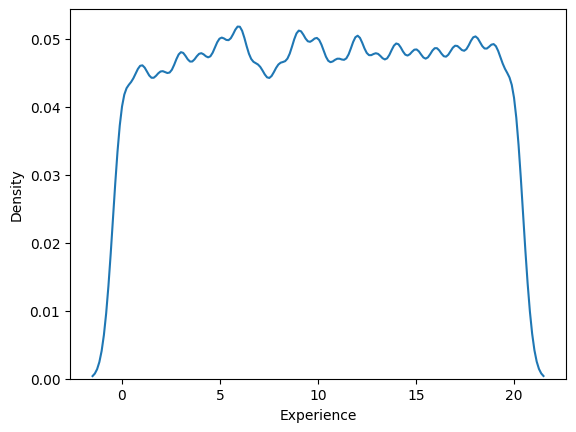

In [ ]:
sns.kdeplot(data['Experience'])

Feature Experience memiliki distribusi normal, jadi tidak diperlukan melalukan fitur transformasi

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Density'>

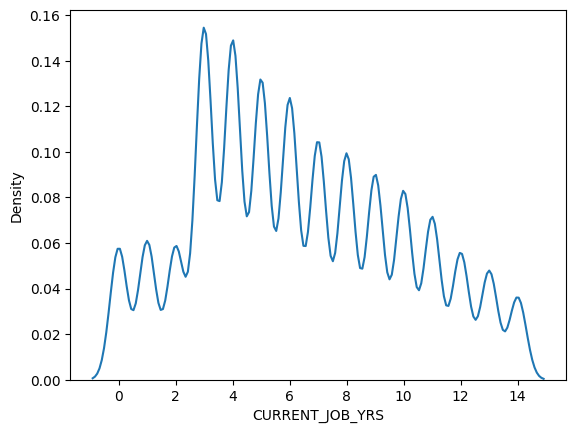

In [ ]:
sns.kdeplot(data['CURRENT_JOB_YRS'])

In [ ]:
# Cek Skewness untuk melihat ke arah mana distribusi nya
from scipy.stats import skew
skewness = skew(data['CURRENT_JOB_YRS'])
print(f"Skewness: {skewness}")

Feature Current_Job_Yrs memiliki distribusi right-skewed

<Axes: xlabel='CURRENT_HOUSE_YRS', ylabel='Density'>

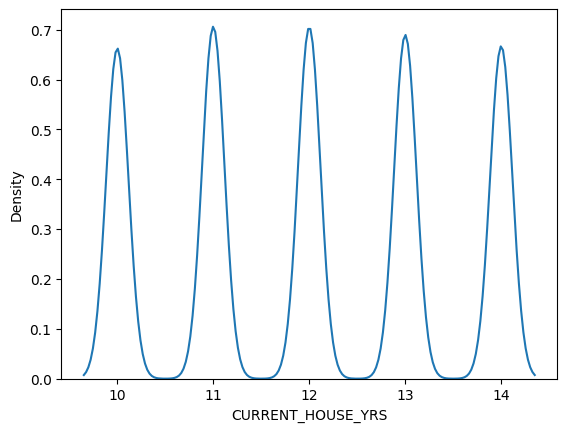

In [ ]:
sns.kdeplot(data['CURRENT_HOUSE_YRS'])

In [ ]:
var_1 = 'CURRENT_HOUSE_YRS'

# Membuat histogram
plt.figure(figsize=(10, 4))
sns.histplot(data[var_1], kde=True)
plt.title('Histogram')
plt.show()

In [ ]:
from scipy.stats import skew
skewness = skew(data['CURRENT_HOUSE_YRS'])
print(f"Skewness: {skewness}")

Feature CURRENT_HOUSE_YRS memiliki distribusi multimodal

**2. Normalization/Standarization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Inisialisasi scaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalisasi CURRENT_HOUSE_YRS & CURRENT_JOB_YRS (karena distribusi yang tidak normal atau bimodal)
data['CURRENT_HOUSE_YRS_norm'] = min_max_scaler.fit_transform(data[['CURRENT_HOUSE_YRS']])
data['CURRENT_JOB_YRS_norm'] = min_max_scaler.fit_transform(data[['CURRENT_JOB_YRS']])

# Standarisasi Income, Age & Experience (karena distribusi datanya sudah mendekati normal)
data['Income_std'] = standard_scaler.fit_transform(data[['Income']])
data['Age_std'] = standard_scaler.fit_transform(data[['Age']])
data['Experience_std'] = standard_scaler.fit_transform(data[['Experience']])


1. CURRENT_JOB_YRS dan CURRENT_HOUSE_YRS dilakukan normalisasi untuk mengatasi perbedaan skala data, karena normalisasi akan membawa data ke rentang yang seragam antara 0 dan 1. Hal ini akan membantu algoritma machine learning yang sensitif terhadap perbedaan skala dalam data, seperti regresi logistik dan k-nearest neighbors, untuk menghasilkan hasil yang lebih baik. Selain itu, normalisasi juga cocok untuk data dengan distribusi yang tidak normal atau bimodal.
2. Age, Income, dan Experience dilakukan standarisasi karena memiliki distribusi mendekati normal. Standarisasi mengubah data menjadi distribusi normal standar dengan rata-rata 0 dan deviasi standar 1, sehingga memenuhi asumsi algoritma machine learning yang mengasumsikan distribusi normal. Dengan standarisasi, variabel-variabel ini akan memiliki dampak yang seimbang pada pemodelan.


In [ ]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,2.520000e+05,2.520000e+05,2.520000e+05
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000,0.499448,0.452420,4.436663e-17,-1.699663e-16,1.169576e-16
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438,0.349759,0.260504,1.000002e+00,1.000002e+00,1.000002e+00
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,-1.732550e+00,-1.696811e+00,-1.680018e+00
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000,0.250000,0.214286,-8.665174e-01,-8.763612e-01,-8.470421e-01
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000,0.500000,0.428571,1.243035e-03,2.691576e-03,-1.406671e-02
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,0.750000,0.642857,8.617520e-01,8.817444e-01,8.189087e-01
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.738114e+00,1.702194e+00,1.651884e+00


In [ ]:
data[['Income', 'Income_std',
    'Age', 'Age_std',
    'Experience', 'Experience_std',
    'CURRENT_JOB_YRS', 'CURRENT_JOB_YRS_norm',
    'CURRENT_HOUSE_YRS', 'CURRENT_HOUSE_YRS_norm']].describe()

,Income,Income_std,Age,Age_std,Experience,Experience_std,CURRENT_JOB_YRS,CURRENT_JOB_YRS_norm,CURRENT_HOUSE_YRS,CURRENT_HOUSE_YRS_norm
count,2.520000e+05,2.520000e+05,252000.000000,2.520000e+05,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,4.436663e-17,49.954071,-1.699663e-16,10.084437,1.169576e-16,6.333877,0.452420,11.997794,0.499448
std,2.878311e+06,1.000002e+00,17.063855,1.000002e+00,6.002590,1.000002e+00,3.647053,0.260504,1.399037,0.349759
min,1.031000e+04,-1.732550e+00,21.000000,-1.696811e+00,0.000000,-1.680018e+00,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,-8.665174e-01,35.000000,-8.763612e-01,5.000000,-8.470421e-01,3.000000,0.214286,11.000000,0.250000
50%,5.000694e+06,1.243035e-03,50.000000,2.691576e-03,10.000000,-1.406671e-02,6.000000,0.428571,12.000000,0.500000
75%,7.477502e+06,8.617520e-01,65.000000,8.817444e-01,15.000000,8.189087e-01,9.000000,0.642857,13.000000,0.750000
max,9.999938e+06,1.738114e+00,79.000000,1.702194e+00,20.000000,1.651884e+00,14.000000,1.000000,14.000000,1.000000


In [ ]:
data_extraction = data_extract[['Asset', 'City_State', 'Age_Married']]
data_extraction

,Asset,City_State,Age_Married
0,4,Other_West Zone,2
1,4,Other_West Zone,4
2,4,Other_South Zone,5
3,3,Other_East Zone,4
4,4,Other_South Zone,4
...,...,...,...
251995,4,Metro_East Zone,4
251996,4,Other_West Zone,2
251997,4,Other_West Zone,4
251998,4,Other_South Zone,4


In [ ]:
data = pd.concat([data, data_extraction], axis=1)
data

,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std,Asset,City_State,Age_Married
0,1,2,0,13,0,6,1,2,0,0,1,3,0.75,0.214286,-1.283145,-1.579604,-1.180232,4,Other_West Zone,2
1,1,2,0,13,0,6,1,1,0,1,2,3,0.75,0.642857,0.895457,-0.583344,-0.014067,4,Other_West Zone,4
2,0,2,0,10,0,6,1,0,0,0,1,2,0.00,0.285714,-0.349269,0.940348,-1.013637,4,Other_South Zone,5
3,1,2,1,12,1,6,1,1,0,0,0,0,0.50,0.142857,0.437526,-0.524740,-1.346827,3,Other_East Zone,4
4,1,2,0,14,1,5,1,1,0,1,1,2,1.00,0.214286,0.268128,-0.173119,0.152528,4,Other_South Zone,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,1,2,0,11,0,3,0,1,0,1,1,0,0.25,0.428571,1.097092,-0.407533,0.485719,4,Metro_East Zone,4
251996,1,2,0,11,0,5,1,2,0,1,1,3,0.25,0.428571,-0.748199,-1.403793,-0.014067,4,Other_West Zone,2
251997,1,2,0,12,0,6,1,1,0,2,2,3,0.50,0.500000,-0.164913,-0.231723,-0.513852,4,Other_West Zone,4
251998,1,2,0,10,0,6,1,1,0,0,0,2,0.00,0.000000,0.524618,-0.290326,-1.680018,4,Other_South Zone,4


### e. Feature Encoding

In [ ]:
# data sebelum diterapkan encoding
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,Millennials,High,Beginner,Mid-level,West Zone,0.75,0.214286,-1.283145,-1.579604,-1.180232
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,Gen X,High,Expert,Senior,West Zone,0.75,0.642857,0.895457,-0.583344,-0.014067
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,Baby Boomers,High,Beginner,Mid-level,South Zone,0.00,0.285714,-0.349269,0.940348,-1.013637
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,Gen X,High,Beginner,Junior,East Zone,0.50,0.142857,0.437526,-0.524740,-1.346827
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,Gen X,High,Expert,Mid-level,South Zone,1.00,0.214286,0.268128,-0.173119,0.152528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,...,Gen X,High,Expert,Mid-level,East Zone,0.25,0.428571,1.097092,-0.407533,0.485719
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,...,Millennials,High,Expert,Mid-level,West Zone,0.25,0.428571,-0.748199,-1.403793,-0.014067
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,...,Gen X,High,Intermediate,Senior,West Zone,0.50,0.500000,-0.164913,-0.231723,-0.513852
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,...,Gen X,High,Beginner,Junior,South Zone,0.00,0.000000,0.524618,-0.290326,-1.680018


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
 13  Profession_Group   252000 non-null  object
 14  City_Group         252000 non-null  object
 15  Age_Group          252000 non-null  object
 16  Income_Group       2

NOTE:
1. Cek untuk hasil scaling nya masih jauh gak range nya antara standarisasi dan normalisasi
2. Untuk range nya gak terlalu jauh, meminimalisasi nya diliat dari tipe distribusinya. Kalo Normal distribution, lebih baik yang menggunakan meannya, dll.
3.

Dengan fungsi LabelEncoder, maka semua kolom yang sudah dipilih untuk di encode (variabel kolom_encode) akan berubah menjadi angka yang sebelumnya kategorikal untuk mempermudah proses learning

NOTE:
1. Lable encoding -> kategori belum tentu berurutan
2. seberapa banyak kategori unik, coba explore lagi encoding nya seperti onehot,  ordinal
3. Untuk data age, experience, lebih cocok pakai ordinal encoding (memperhatikan urutan kategori)
4. Untuk waktu ada lagi encoder yang berbeda

In [6]:
from sklearn.preprocessing import OrdinalEncoder

data_to_encode = {
    'Age_Group': ['Millennials', 'Gen X', 'Baby Boomers'],
    'Experience_Group': ['Beginner', 'Expert', 'Intermediate'],
    "Income_Group": ['High', 'Medium', 'Low'],
    "CURRENT_JOB_Group": ['Mid-level', 'Senior', 'Junior'],
}

df = pd.DataFrame(data_to_encode)

# definisi urutan ordinal yang benar
age_order = ['Millennials', 'Gen X', 'Baby Boomers']
exp_order = ['Beginner', 'Intermediate', 'Expert']
income_order = ['Low', 'Medium', 'High']
jobLevel_order = ['Junior', 'Mid-level', 'Senior']

# inisialisasi ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[age_order, exp_order, income_order, jobLevel_order])

# transform data ordinal
df[['Age_Group', 'Experience_Group', 'Income_Group', 'CURRENT_JOB_Group']] = ordinal_encoder.fit_transform(df[['Age_Group', 'Experience_Group', 'Income_Group', 'CURRENT_JOB_Group']])

print(df)


   Age_Group  Experience_Group  Income_Group  CURRENT_JOB_Group
0        0.0               0.0           2.0                1.0
1        1.0               2.0           1.0                2.0
2        2.0               1.0           0.0                0.0


In [7]:
from sklearn.preprocessing import LabelEncoder

# definisi kategori & nilai unique
categories = {
    "Married/Single": ['single', 'married'],
    "House_Ownership": ['rented', 'norent_noown', 'owned'],
    "Car_Ownership": ['no', 'yes'],
    "Profession_Group": ['Research, Engineering & IT', 'Public Service', 'Finance', 'Other', 'Healthcare', 'Art & Entertainment', 'Excecutive'],
    "City_Group": ['Other', 'Urban', 'Town', 'Suburban', 'Metro', 'Rural'],
    "State_Zone": ['West Zone', 'South Zone', 'East Zone', 'North Zone']
}

# buat object labelencoder
label_encoders = {col: LabelEncoder() for col in categories}

# Encode semua kategori yang ada di variabel categories
encoded_categories = {}
for col, encoder in label_encoders.items():
    encoded_categories[col] = encoder.fit_transform(categories[col])

# hasil encoded
for col, encoder in label_encoders.items():
    print(f"{col}:", list(encoder.classes_), encoded_categories[col])


Married/Single: ['married', 'single'] [1 0]
House_Ownership: ['norent_noown', 'owned', 'rented'] [2 0 1]
Car_Ownership: ['no', 'yes'] [0 1]
Profession_Group: ['Art & Entertainment', 'Excecutive', 'Finance', 'Healthcare', 'Other', 'Public Service', 'Research, Engineering & IT'] [6 5 2 4 3 0 1]
City_Group: ['Metro', 'Other', 'Rural', 'Suburban', 'Town', 'Urban'] [1 5 4 3 0 2]
State_Zone: ['East Zone', 'North Zone', 'South Zone', 'West Zone'] [3 2 0 1]


Encoding dilakukan 2x untuk keperluan berbeda, Ordinal encoding dilakukan untuk data yang sifatnya berurutan. Label encoding dilakukan untuk data yang butuh direpresentasikan dengan angka untuk mempermudah proses learning

Karena masih ada kolom sebelum grouping yang masih tersisa, maka bisa dilakukan drop column untuk langkah selanjutnya

### f. Handle Class Imbalance

NOTE:
1. Dibuat persenan Total Data berdasarkan Risk_Flag untuk cek rasio label nya
2. Metode nya Under sampling atau Over sampling


In [ ]:
columns_to_drop = ['Id', 'Income', 'Age', 'Experience', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS']
for column in columns_to_drop:
    if column in data.columns:
        data = data.drop(column, axis=1)
data

,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std
0,1,2,0,13,0,6,1,2,0,0,1,3,0.75,0.214286,-1.283145,-1.579604,-1.180232
1,1,2,0,13,0,6,1,1,0,1,2,3,0.75,0.642857,0.895457,-0.583344,-0.014067
2,0,2,0,10,0,6,1,0,0,0,1,2,0.00,0.285714,-0.349269,0.940348,-1.013637
3,1,2,1,12,1,6,1,1,0,0,0,0,0.50,0.142857,0.437526,-0.524740,-1.346827
4,1,2,0,14,1,5,1,1,0,1,1,2,1.00,0.214286,0.268128,-0.173119,0.152528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,1,2,0,11,0,3,0,1,0,1,1,0,0.25,0.428571,1.097092,-0.407533,0.485719
251996,1,2,0,11,0,5,1,2,0,1,1,3,0.25,0.428571,-0.748199,-1.403793,-0.014067
251997,1,2,0,12,0,6,1,1,0,2,2,3,0.50,0.500000,-0.164913,-0.231723,-0.513852
251998,1,2,0,10,0,6,1,1,0,0,0,2,0.00,0.000000,0.524618,-0.290326,-1.680018


In [ ]:
nan_data=data[data.isna().any(axis=1)]
nan_data

,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std


In [ ]:
data.describe()

,Married/Single,House_Ownership,Car_Ownership,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,CURRENT_HOUSE_YRS_norm,CURRENT_JOB_YRS_norm,Income_std,Age_std,Experience_std
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.00000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,2.520000e+05,2.520000e+05,2.520000e+05
mean,0.897905,1.891722,0.301587,11.997794,0.123000,4.39829,1.210897,0.894575,0.176599,1.014032,1.310353,1.438738,0.499448,0.452420,4.436663e-17,-1.699663e-16,1.169576e-16
std,0.302774,0.391880,0.458948,1.399037,0.328438,1.97472,0.837263,0.858198,0.551837,0.686170,0.693928,1.134561,0.349759,0.260504,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,0.000000,0.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.732550e+00,-1.696811e+00,-1.680018e+00
25%,1.000000,2.000000,0.000000,11.000000,0.000000,3.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.250000,0.214286,-8.665174e-01,-8.763612e-01,-8.470421e-01
50%,1.000000,2.000000,0.000000,12.000000,0.000000,5.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.500000,0.428571,1.243035e-03,2.691576e-03,-1.406671e-02
75%,1.000000,2.000000,1.000000,13.000000,0.000000,6.00000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000,0.750000,0.642857,8.617520e-01,8.817444e-01,8.189087e-01
max,1.000000,2.000000,1.000000,14.000000,1.000000,6.00000,5.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.738114e+00,1.702194e+00,1.651884e+00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop('Risk_Flag', axis=1)

X = X.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(X, data['Risk_Flag'], test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

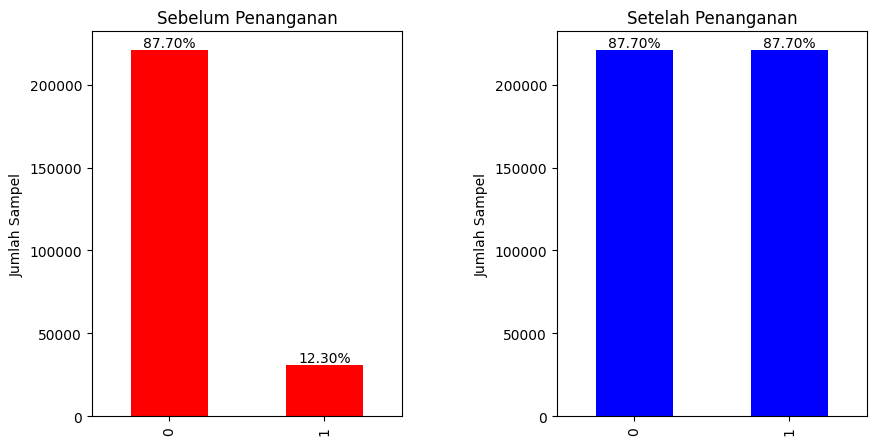

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_distribution_before = data['Risk_Flag'].value_counts()


from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, data['Risk_Flag'])

data_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
data_resampled['Risk_Flag'] = y_resampled


class_distribution_after = data_resampled['Risk_Flag'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5)


class_distribution_before.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Sebelum Penanganan')
axes[0].set_ylabel('Jumlah Sampel')


class_distribution_after.plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('Setelah Penanganan')
axes[1].set_ylabel('Jumlah Sampel')

for ax in axes:
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()


Karena ditemukannya distribusi data yang tidak seimbang yang menyebabkan model klasifikasi menjadi bias dan kurang mampu memprediksi kelas minoritas dengan baik. Maka dilakukan handle class imbalanced dengan pendekatan oversampling.

## 2. Feature Engineering

### a. Feature Selection

<ipython-input-8-d5930a9eba39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.3f')


<Axes: >

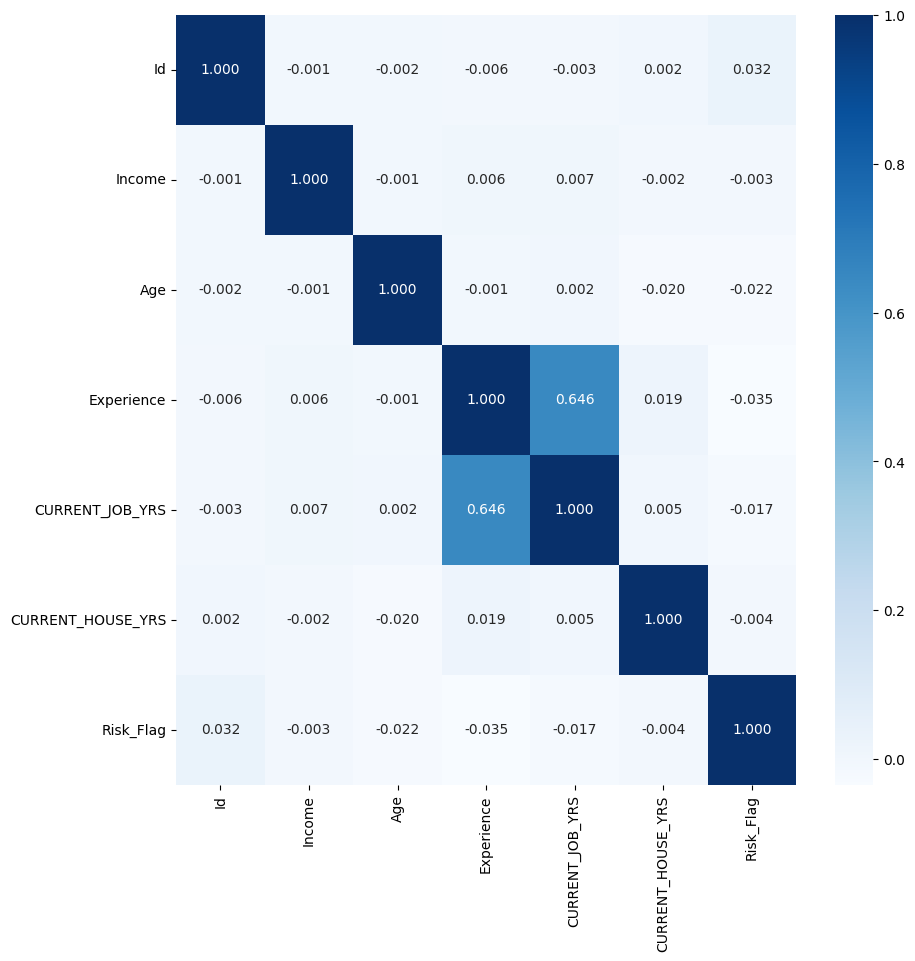

In [8]:
# heatmap untuk mengetahui nilai korelasi antar feature
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.3f')

In [9]:
# melihat nilai korelasi feature dengan feature target
data.corr()['Risk_Flag'].sort_values()

<ipython-input-9-88428191e5d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Risk_Flag'].sort_values()


Experience          -0.034523
Age                 -0.021809
CURRENT_JOB_YRS     -0.016942
CURRENT_HOUSE_YRS   -0.004375
Income              -0.003091
Id                   0.032153
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64

**Kesimpulan: <br>**
1. Feature yang memiliki nilai korelasi tertinggi dengan feature target adalah CURRENT_JOB_Group dengan nilai (-0.284), Experience_Group (-0.251), dan Car_Ownership (-0.24). Namun ketiga feature tersebut memiliki nilai korelasi yang negatif artinya jika Jika nilai feature tsb naik maka feature targetnya turun atau risiko gagal bayar nya turun.
2. Adapun pada feature House_Ownership dengan nilai (0.024) dan feature Married/Single (0.211) memiliki nilai korelasi positif.
3. Sedangkan untuk feature City_Group dengan State_Zone memiliki nilai korelasi yang tinggi (0.173) artinya kedua feature tersebut redundan atau data nya memiliki kesamaan.

Rekomendasi: <br>
1. Feature CURRENT_JOB_Group, Experience_Group, Car_Ownership, House_Ownership, feature Married/Single harus dipertahankan ketika melakukan modeling
2. Adapun feature yang nilai korelasinya rendah bisa di drop untuk menhindari kompleksitas feature saat modeling. Namun pertimbangkan juga fetaure lainnya untuk menghindari underfitting.
3. Feature City_Group dengan State_Zone memiliki nilai korelasi yang tinggi atau redundan, maka salah satu dari feature tersebut harus dihapus.

### b. Feature Extraction

In [ ]:
data_extract

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


#### 1. Pembuatan Kolom Data Baru dengan Kombinasi Group Data City_Group dan State_Zone

In [ ]:
data_group['City_State'] = data_group['City_Group'] + '_' + data_group['State_Zone']

In [ ]:
data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,13,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone,Other_West Zone
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,13,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone,Other_West Zone
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,10,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone,Other_South Zone
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,12,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone,Other_East Zone
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,14,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone,Other_South Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,...,11,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone,Metro_East Zone
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,...,11,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone,Other_West Zone
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,...,12,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone,Other_West Zone
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,...,10,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone,Other_South Zone


#### 2. Pembuatan Kolom Data Baru "Asset" dengan Status Kepemilikan Rumah dan Mobil

In [ ]:
# Membuat mapping dari kombinasi kelas House_Ownership dan Car_Ownership ke nilai baru
mapping = {
    ('owned', 'yes'): 1,
    ('owned', 'no'): 2,
    ('rented', 'yes'): 3,
    ('rented', 'no'): 4,
    ('norent_noown', 'yes'): 5,
    ('norent_noown', 'no'): 6
}

# Menggunakan map untuk menggabungkan kelas
data_extract['Asset'] = data_extract[['House_Ownership', 'Car_Ownership']].apply(lambda x: mapping.get(tuple(x)), axis=1)
data_extract

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Asset
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,4
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,4
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,4
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,3
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,4
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,4
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,4
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,4


#### 3. Pembuatan Kolom Data Baru "Age_Married" dengan Status Married dan Generasi

Data ini dapat berguna untuk mengetahui pengaruh status married dan umur

In [ ]:
data_group['Age_Married'] = data_group['Age_Group'] + ' ' + data_group['Married/Single']

# Map value
data_group['Age_Married'] = data_group['Age_Married'].replace({
    'Millennials married': 1,
    'Millennials single': 2,
    'Gen X married': 3,
    'Gen X single': 4,
    'Baby Boomers married': 5,
    'Baby Boomers single': 6
})

In [ ]:
data_group

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Risk_Flag,Profession_Group,City_Group,Age_Group,Income_Group,Experience_Group,CURRENT_JOB_Group,State_Zone,City_State,Age_Married
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0,"Research, Engineering & IT",Other,Millennials,High,Beginner,Mid-level,West Zone,Other_West Zone,2
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,0,"Research, Engineering & IT",Other,Gen X,High,Expert,Senior,West Zone,Other_West Zone,4
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,0,"Research, Engineering & IT",Other,Baby Boomers,High,Beginner,Mid-level,South Zone,Other_South Zone,5
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,1,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,East Zone,Other_East Zone,4
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,1,Public Service,Other,Gen X,High,Expert,Mid-level,South Zone,Other_South Zone,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,...,0,Healthcare,Metro,Gen X,High,Expert,Mid-level,East Zone,Metro_East Zone,4
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,...,0,Public Service,Other,Millennials,High,Expert,Mid-level,West Zone,Other_West Zone,2
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,...,0,"Research, Engineering & IT",Other,Gen X,High,Intermediate,Senior,West Zone,Other_West Zone,4
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,...,0,"Research, Engineering & IT",Other,Gen X,High,Beginner,Junior,South Zone,Other_South Zone,4


#### Hasil Data

In [ ]:
data_extract = data_extract.merge(data_group[['City_State', 'Age_Married']], left_index=True, right_index=True)